In [1]:
%matplotlib notebook
#%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import MDAnalysis as mda
import pyrexMD.misc as misc
import pyrexMD.core as core
import pyrexMD.analysis.analysis as ana
import pyrexMD.analysis.gdt as gdt

misc.apply_matplotlib_rc_settings()

In [2]:
pdb = "files/traj/2hba_ChainB_ref.pdb"
top = "files/traj/traj_protein.tpr"
traj = "files/traj/traj_protein.xtc"

ref = mda.Universe(pdb)
mobile = mda.Universe(top, traj)

tv = core.iPlayer(mobile)
tv()

<IPython.core.display.Javascript object>


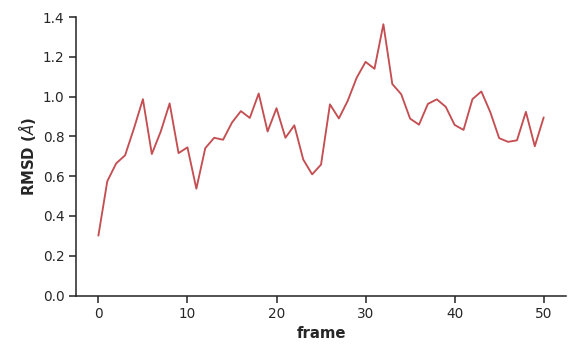

pickle.dumped figure as: /home/arthur/Dropbox/#PhD/#my_scripts/myPKG/pyrexMD/pyrexMD/examples/files/pickle/RMSD_PLOT.pickle


<IPython.core.display.Javascript object>


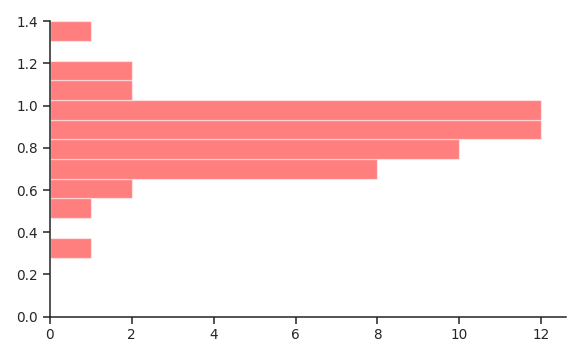

pickle.dumped figure as: /home/arthur/Dropbox/#PhD/#my_scripts/myPKG/pyrexMD/pyrexMD/examples/files/pickle/RMSD_HIST.pickle


In [3]:
# get some data to plot
FRAME, TIME, RMSD = ana.get_RMSD(mobile, ref)

# plot and pickle dump
fig , ax = ana.PLOT(xdata=FRAME, ydata=RMSD, alpha=1, marker=None, xlabel="frame", ylabel=r"RMSD ($\AA$)")
plt.ylim(0.0, 1.4)
pickle_RMSD = misc.pickle_dump(fig, "files/pickle/RMSD_PLOT.pickle")
fig, ax, hist = ana.plot_hist(RMSD, n_bins=15, vmin=0.0, vmax=1.4, orientation="horizontal")
pickle_HIST = misc.pickle_dump(fig, "files/pickle/RMSD_HIST.pickle")

<IPython.core.display.Javascript object>


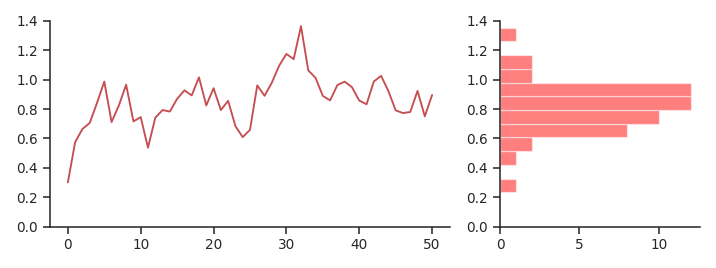

<IPython.core.display.Javascript object>


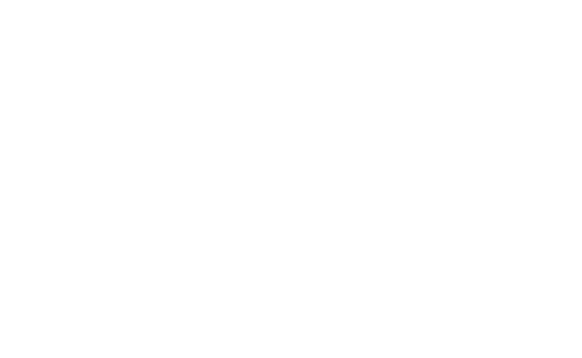

<IPython.core.display.Javascript object>


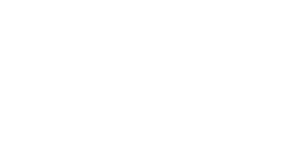

In [4]:
# example of reusing figures/pickles for multifigure
# Bug: %matplotlib notebook backend leaves empty space below when closing figs which were loaded via pickle.
fig, ax = misc.pickle_plot([pickle_RMSD, pickle_HIST], figsize=(8,3), wr=[2,1], hr=[1,1])

<IPython.core.display.Javascript object>


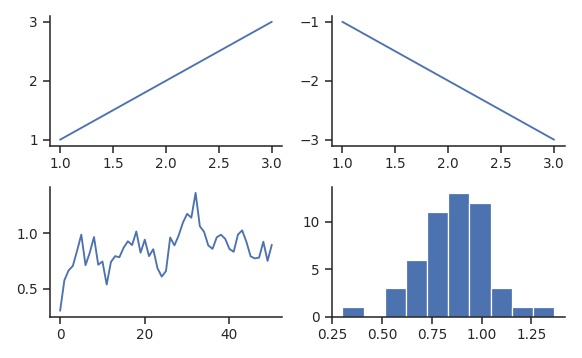

In [5]:
# example of making a multifigure on the fly
fig, ax = misc.figure(grid=[2, 2])
plt.sca(ax[0])
plt.plot([1,2,3],[1,2,3])
plt.sca(ax[1])
plt.plot([1,2,3],[-1,-2,-3])
plt.sca(ax[2])
plt.plot(FRAME,RMSD)
plt.sca(ax[3])
plt.hist(RMSD)
plt.tight_layout()